<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Модель-для-подбора-нужного-тарифа" data-toc-modified-id="Модель-для-подбора-нужного-тарифа-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Модель для подбора нужного тарифа</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li></ul></li><li><span><a href="#Импорт-и-константы" data-toc-modified-id="Импорт-и-константы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт и константы</a></span></li><li><span><a href="#Загрузка-данных-и-их-обзор" data-toc-modified-id="Загрузка-данных-и-их-обзор-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных и их обзор</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Мультиколлениарность" data-toc-modified-id="Мультиколлениарность-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Мультиколлениарность</a></span></li></ul></li><li><span><a href="#Машинное-обучение" data-toc-modified-id="Машинное-обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Машинное обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающую,-тестовую-и--валидационную-выборки" data-toc-modified-id="Разделение-данных-на-обучающую,-тестовую-и--валидационную-выборки-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разделение данных на обучающую, тестовую и  валидационную выборки</a></span></li><li><span><a href="#Обучение-модели-дерево-решений" data-toc-modified-id="Обучение-модели-дерево-решений-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Обучение модели дерево решений</a></span></li><li><span><a href="#Обучение-модели-случайный-лес" data-toc-modified-id="Обучение-модели-случайный-лес-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучение модели случайный лес</a></span></li><li><span><a href="#Обучечние-модели-логистической-регресии" data-toc-modified-id="Обучечние-модели-логистической-регресии-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Обучечние модели логистической регресии</a></span></li><li><span><a href="#Выбор-и-тестирование-приоритетной-модели" data-toc-modified-id="Выбор-и-тестирование-приоритетной-модели-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Выбор и тестирование приоритетной модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li></ul></div>

# Модель для подбора нужного тарифа

## Описание проекта

Необходиом построить модель предсказывающий какой лучше тариф для клиентов. Нужна модель с максимально большим значением accuracy. Нужно довести долю правильных ответов на тестовой выборке по крайней мере до 0.75. 

<div class="alert alert-block alert-info">
<b>Совет:</b> Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение :) Молодец, что описание пишешь своими словами, не копируешь дословно описание проекта для студентов, так оно не выглядит как инструкция, а работа выглядит более самостоятельной.
</div>

# Импорт и константы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from joblib import dump, load

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score
)

In [2]:
accuracy_threshold = 0.75

# Загрузка данных и их обзор 

In [3]:
try:
    df = pd.read_csv('datasets/users_behavior.csv')
except Exception as e:
    print(e)
    df = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.6 KB


Пропусков нет, данные полные и с правильными типами

In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<Figure size 720x720 with 0 Axes>

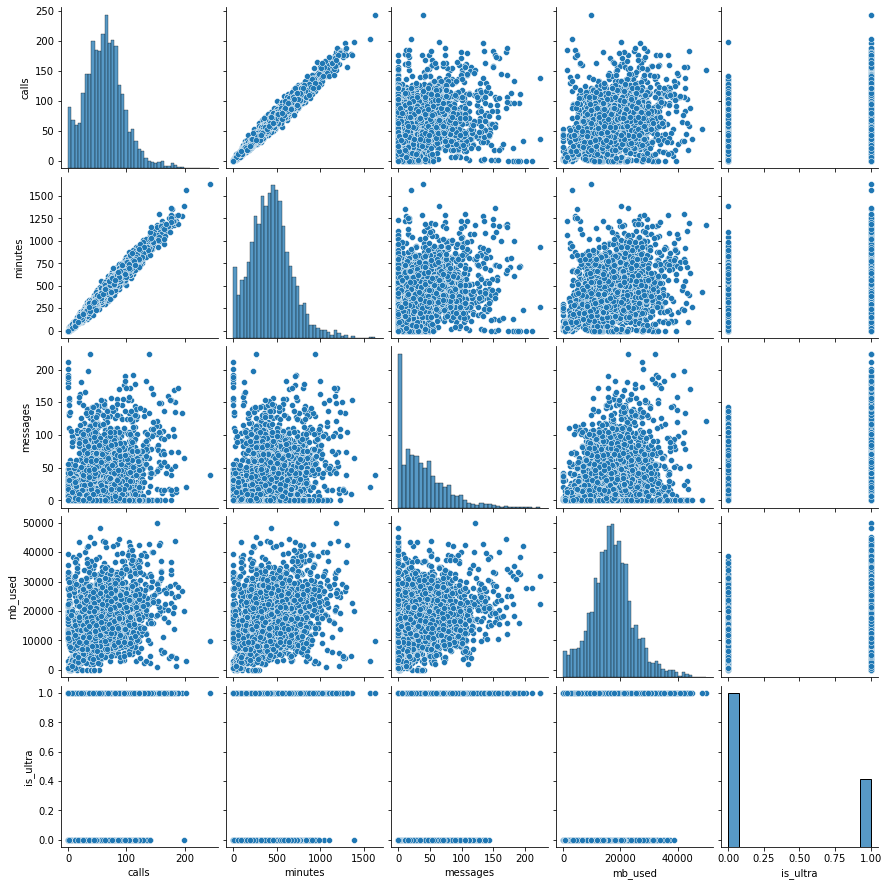

In [6]:
fig = plt.figure(figsize=(10, 10))
sns.pairplot(df)
plt.show()

Распределение данных адекватное. Вызывает вопрос большое количество нулей в сообщейниях. Наверно, это связано с тем, что при расцвете интеренет-мессенджеров спрос на смс падает.

# Предобработка данных

## Баланс классов

In [7]:
df["is_ultra"].value_counts( )/len(df)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

В данных имеется диспропорция классов. Это нужно будет учесть при работе с моделью.

## Мультиколлениарность

Проверим данные на скореллированость

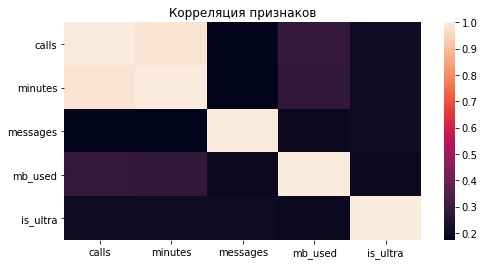

In [8]:
fig = plt.figure(figsize=(8, 4))
sns.heatmap(df.corr())
plt.title('Корреляция признаков')
plt.show()

На тепловой карте видно, что звонки и потраченные минуты высокоскоррелированные признаки. Нужно избавиться от одно из них. Логично будет избавиться от звонков, так как в основном тарифы расчитаны на какое-то количество минут.

In [9]:
df = df.drop('calls', axis=1)

In [10]:
df.corr()

,minutes,messages,mb_used,is_ultra
minutes,1.000000,0.173110,0.280967,0.206955
messages,0.173110,1.000000,0.195721,0.203830
mb_used,0.280967,0.195721,1.000000,0.198568
is_ultra,0.206955,0.203830,0.198568,1.000000


Осталось три признака, которые слабо скоррелированы.

# Машинное обучение

## Разделение данных на обучающую, тестовую и  валидационную выборки

Выделим признаки и целевой параметр

In [11]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [12]:
df.shape

(3214, 4)

Выделим тестовую выборку

In [13]:
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    stratify=target,
    test_size=0.25,
    random_state=25
)

Посмотрим на размеры тестовой выборки

In [14]:
features_test.shape

(804, 3)

In [15]:
target_test.shape

(804,)

Проверим разбивку на классы

In [16]:
target_test.value_counts()/len(target_test)

0    0.69403
1    0.30597
Name: is_ultra, dtype: float64

Соотношение сохраняется

Выделим валидационную выборку

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train,
    target_train,
    test_size=0.25,
    stratify=target_train,
    random_state=25
)

Размер валидационной выборки

In [18]:
features_valid.shape

(603, 3)

In [19]:
target_valid.shape

(603,)

In [20]:
target_valid.value_counts()/len(target_valid)

0    0.693201
1    0.306799
Name: is_ultra, dtype: float64

Баланс классов соблюден

Размер обучающей выборки

In [21]:
features_train.shape

(1807, 3)

In [22]:
target_train.shape

(1807,)

In [23]:
target_train.value_counts()/len(target_train)

0    0.693414
1    0.306586
Name: is_ultra, dtype: float64

Баланс классов сохранен

Выделены все необходимые подвыборки

## Обучение модели дерево решений

Проведем исследование и выявим модель с наилучшими результатами

In [24]:
best_tree_model = None

list_results_tree_accuracy = []
list_results_tree_precision = []
list_results_tree_recall = []
for depth in range(1, 8):
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=25)
    model_tree.fit(features_train, target_train)
    predictions = model_tree.predict(features_valid)
    
    accuracy_tree = accuracy_score(target_valid, predictions)
    precision_tree = precision_score(target_valid, predictions)
    recall_tree = recall_score(target_valid, predictions)
    
    list_results_tree_accuracy.append(accuracy_tree)
    list_results_tree_precision.append(precision_tree)
    list_results_tree_recall.append(recall_tree)

In [25]:
df_res_tree = pd.DataFrame()
df_res_tree['accuracy'] = list_results_tree_accuracy
df_res_tree['recall'] = list_results_tree_recall
df_res_tree['precision'] = list_results_tree_precision
df_res_tree['depth'] = [x for x in range(1,8)]

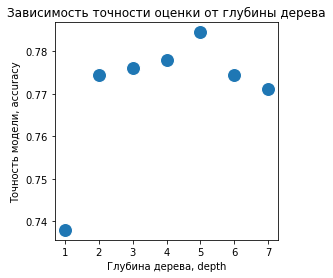

In [26]:
fig = plt.figure(figsize=(4, 4))
sns.scatterplot(data=df_res_tree, x='depth', y='accuracy', s=200)
plt.title('Зависимость точности оценки от глубины дерева')
plt.xlabel("Глубина дерева, depth")
plt.ylabel("Точность модели, accuracy")
plt.show()

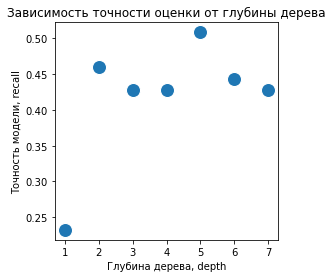

In [27]:
fig = plt.figure(figsize=(4, 4))
sns.scatterplot(data=df_res_tree, x='depth', y='recall', s=200)
plt.title('Зависимость точности оценки от глубины дерева')
plt.xlabel("Глубина дерева, depth")
plt.ylabel("Точность модели, recall")
plt.show()

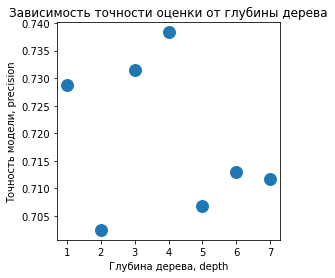

In [28]:
fig = plt.figure(figsize=(4, 4))
sns.scatterplot(data=df_res_tree, x='depth', y='precision', s=200)
plt.title('Зависимость точности оценки от глубины дерева')
plt.xlabel("Глубина дерева, depth")
plt.ylabel("Точность модели, precision")
plt.show()

Из графиков видно, что модель дерева решений лучше всего справляется при глубине 4. Так как все три метрики показывают высокое значение.

In [29]:
best_tree_model = DecisionTreeClassifier(max_depth=4, random_state=25)

## Обучение модели случайный лес

Проведем исследование и выявим модель с наилучшими результатами

In [30]:
best_forest_model = None
best_forest_result = 0
best_forest_depth = 0
list_results_forest_accuracy = []
list_est_forest_accuracy = []
list_depth_forest_accuracy = []
list_est_forest_accuracy = []
list_results_forest_precision = []
list_results_forest_recall = []
for est in range(2, 51):
    for depth in range(1, 8):
        model_forest = RandomForestClassifier(max_depth=depth, random_state=25, n_estimators=est)
        model_forest.fit(features_train, target_train)
        predictions = model_forest.predict(features_valid)
        accuracy_forest = accuracy_score(target_valid, predictions)
        precision_forest = precision_score(target_valid, predictions)
        recall_forest = recall_score(target_valid, predictions)
        
        list_results_forest_accuracy.append(accuracy_forest)
        list_results_forest_precision.append(precision_forest)
        list_results_forest_recall.append(recall_forest)
        
        list_est_forest_accuracy.append(depth)
        list_depth_forest_accuracy.append(est)
        

In [31]:
df_res_forest = pd.DataFrame()
df_res_forest['accuracy'] = list_results_forest_accuracy
df_res_forest['depth'] = list_depth_forest_accuracy
df_res_forest['recall'] = list_results_forest_recall
df_res_forest['precision'] = list_results_forest_precision
df_res_forest['est'] = list_est_forest_accuracy

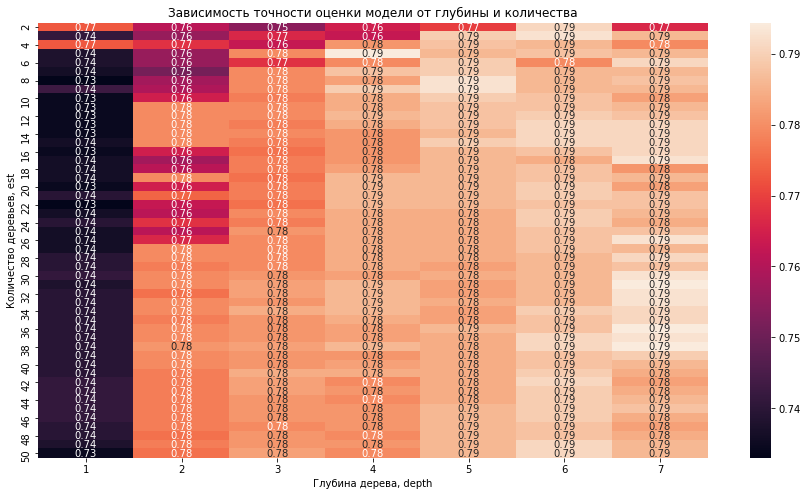

In [32]:
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df_res_forest.pivot('depth', 'est', 'accuracy'), annot=True)
plt.title('Зависимость точности оценки модели от глубины и количества')
plt.xlabel("Глубина дерева, depth")
plt.ylabel("Количество деревьев, est")
plt.show()

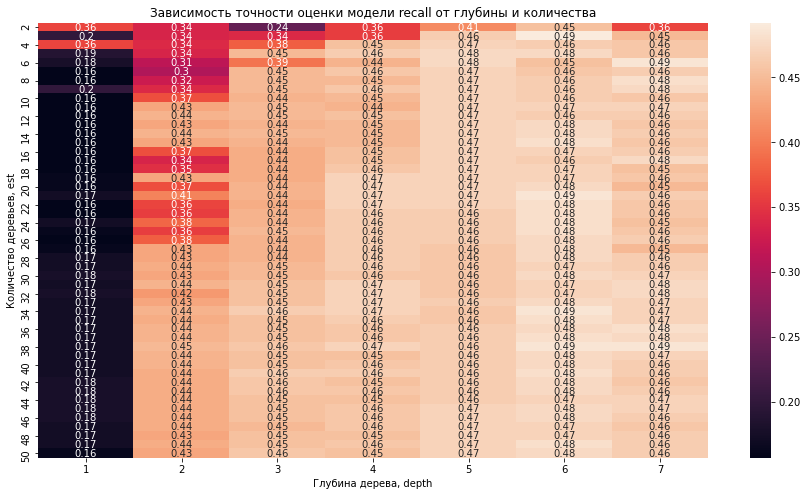

In [33]:
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df_res_forest.pivot('depth', 'est', 'recall'), annot=True)
plt.title('Зависимость точности оценки модели recall от глубины и количества')
plt.xlabel("Глубина дерева, depth")
plt.ylabel("Количество деревьев, est")
plt.show()

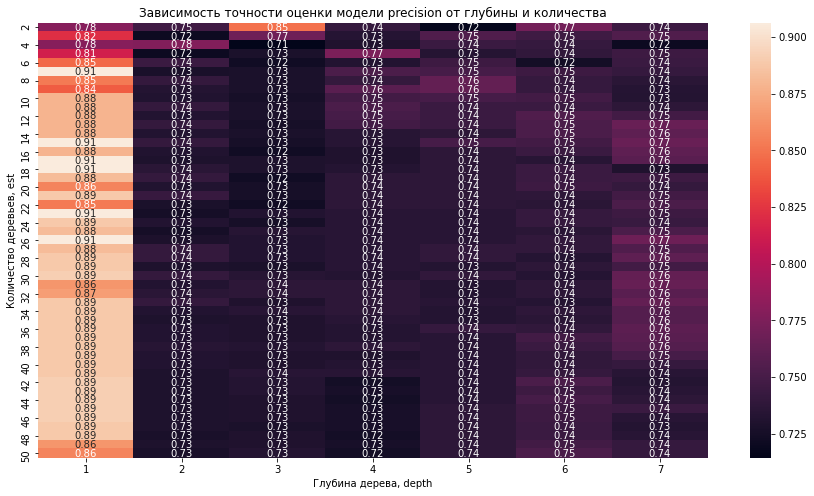

In [34]:
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df_res_forest.pivot('depth', 'est', 'precision'), annot=True)
plt.title('Зависимость точности оценки модели precision от глубины и количества')
plt.xlabel("Глубина дерева, depth")
plt.ylabel("Количество деревьев, est")
plt.show()

Из графика видно, что был получена максимальная эффективность при глубине 6 и количестве деревьев 3. Так как большиство метрикимеет наибольшее значние:
* accuracy = 0.79
* recall = 0.49
* precision = 0.75

Возьмем эту модель за основу.

Попробуем улучшить модель

In [35]:
list_results_forest_accuracy = []
list_leaf_forest_accuracy = []
list_split_forest_accuracy = []
list_results_forest_precision = []
list_results_forest_recall = []
for split in range(2, 10):
    for leaf in range(1, 10):
        model_forest = RandomForestClassifier(
            max_depth=6,
            random_state=25,
            n_estimators=3,
            min_samples_split=split,
            min_samples_leaf=leaf
        )
        model_forest.fit(features_train, target_train)
        predictions = model_forest.predict(features_valid)
        accuracy_forest = accuracy_score(target_valid, predictions)
        list_results_forest_accuracy.append(accuracy_forest)
        list_leaf_forest_accuracy.append(leaf)
        list_split_forest_accuracy.append(split)
        
        precision_forest = precision_score(target_valid, predictions)
        recall_forest = recall_score(target_valid, predictions)
        
        list_results_forest_precision.append(precision_forest)
        list_results_forest_recall.append(recall_forest)
        

In [36]:
df_res_forest = pd.DataFrame()
df_res_forest['accuracy'] = list_results_forest_accuracy
df_res_forest['precision'] = list_results_forest_precision
df_res_forest['recall'] = list_results_forest_recall
df_res_forest['split'] = list_split_forest_accuracy
df_res_forest['leaf'] = list_leaf_forest_accuracy

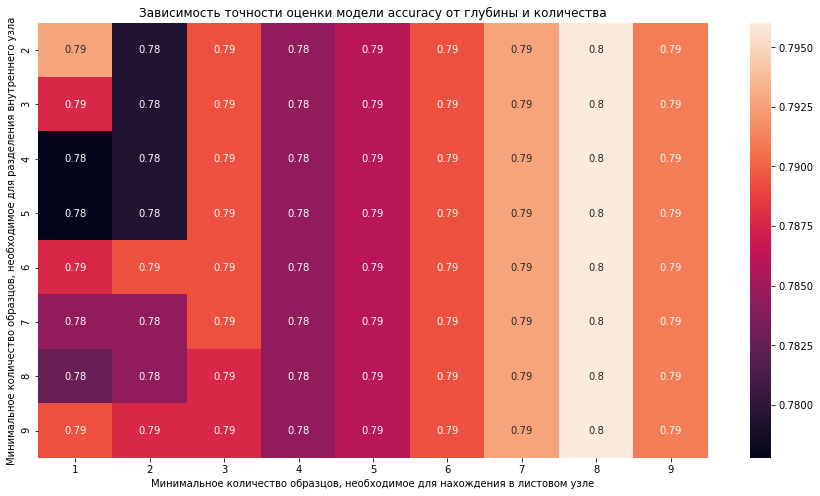

In [37]:
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df_res_forest.pivot('split', 'leaf', 'accuracy'), annot=True)
plt.title('Зависимость точности оценки модели accuracy от глубины и количества')
plt.xlabel("Минимальное количество образцов, необходимое для нахождения в листовом узле")
plt.ylabel("Минимальное количество образцов, необходимое для разделения внутреннего узла")
plt.show()

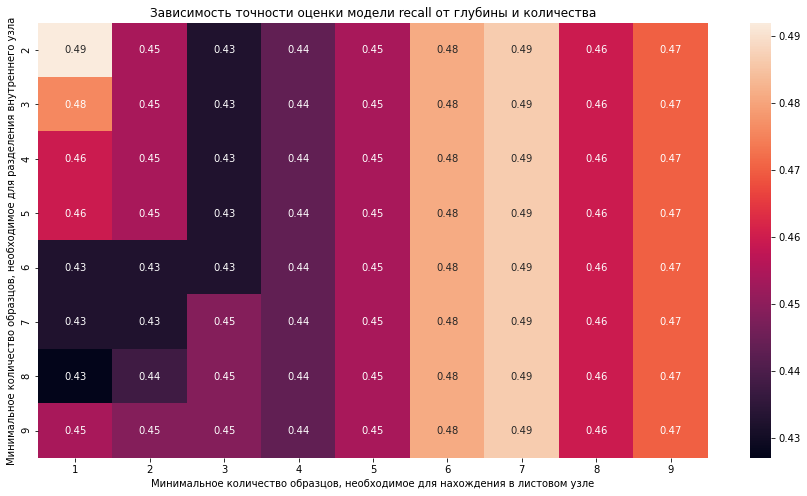

In [38]:
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df_res_forest.pivot('split', 'leaf', 'recall'), annot=True)
plt.title('Зависимость точности оценки модели recall от глубины и количества')
plt.xlabel("Минимальное количество образцов, необходимое для нахождения в листовом узле")
plt.ylabel("Минимальное количество образцов, необходимое для разделения внутреннего узла")
plt.show()

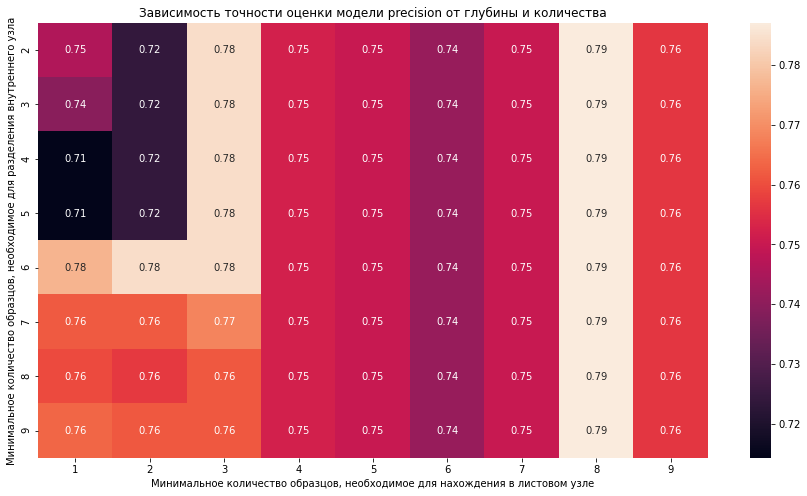

In [39]:
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df_res_forest.pivot('split', 'leaf', 'precision'), annot=True)
plt.title('Зависимость точности оценки модели precision от глубины и количества')
plt.xlabel("Минимальное количество образцов, необходимое для нахождения в листовом узле")
plt.ylabel("Минимальное количество образцов, необходимое для разделения внутреннего узла")
plt.show()

Дополнительное исследование показало, что минимальное количество образцов равное восемь увеличивает метрики. Возьмем модель  с  максимальной эффективностью при глубине 6 и количестве деревьев 3, минимальное количество образцов на листовой узел 8. 

In [40]:
best_model_forest = RandomForestClassifier(
            max_depth=6,
            random_state=25,
            n_estimators=3,
            min_samples_leaf=8
        )

## Обучечние модели логистической регресии

Проведем обучение и выявим модель с наилучшими результатами

In [41]:
model_lg = LogisticRegression(random_state=25)
model_lg.fit(features_train, target_train)
predictions = model_lg.predict(features_valid)
accuracy_lg = accuracy_score(target_valid, predictions)

precision_lg = precision_score(target_valid, predictions)
recall_lg = recall_score(target_valid, predictions)

print(
    f"Лучшая модель дерева решений имеет: \n" +
    f"accuracy = {accuracy_lg}\n" +
    f"precision = {precision_lg}\n" +
    f"recall = {recall_lg}\n"
)

if accuracy_threshold < accuracy_lg:
    print('Эта модель может учатсвовать в отборе')
else:
    print("Модель не набрала нужный уровень точности на валидационной выборке")

Лучшая модель дерева решений имеет: 
accuracy = 0.693200663349917
precision = 0.5
recall = 0.010810810810810811

Модель не набрала нужный уровень точности на валидационной выборке


Видно, что по результатам валидации логистическая регрессия не набирает нужный уровень точночти

## Выбор и тестирование приоритетной модели

Наибольший уровень точности был обнаружен у моделт случайный лес с параметрами глубины равными 6 и количеством деревьев равным 50

In [42]:
model_result = RandomForestClassifier(
    max_depth=6,
    random_state=25,
    n_estimators=3,
    min_samples_leaf=8
)
model_result.fit(features_train, target_train)
predictions = model_result.predict(features_test)
accuracy_forest = accuracy_score(target_test, predictions)
precision_forest = precision_score(target_test, predictions)
recall_forest = recall_score(target_test, predictions)
print("accuracy_forest", round(accuracy_forest, 3))
print("recall", round(recall_forest, 3))
print("precision", round(precision_forest, 3))
if accuracy_threshold < accuracy_forest:
    print('Эта модель может быть использована для определения подходящего тарифа')
else:
    print("Модель не набрала нужный уровень точности на валидационной выборке")

accuracy_forest 0.799
recall 0.484
precision 0.773
Эта модель может быть использована для определения подходящего тарифа


In [43]:
dump(model_result, "RandomForestClassifier, acc=0.799, recall=0.484, precision=0.773.joblib")

['RandomForestClassifier, acc=0.799, recall=0.484, precision=0.773.joblib']

Изначально, в наших данных был дисбаланс классов, что могло привести к неверному обучению модели. Для проверки адекватности модели мы можем сравнить её результат с результатом, который можно  было получить без обучения модели. Дисбаланс составлял  70/30. Следовательно можно преположить, что если бы мы не обучаясь называли всех элементы датасета преобладающим классом, мы бы были правы в 70% случаев. Наша модель дает 79,9% верных ответов, что говорит о том, что её применение обосновано и она работает адекватно.

# Выводы 

В данном исследовании выявлено, что RandomForestClassifier с параметрами глубина равная 6 и количеством деревьев равным 3, минимальное количество элементов на лист - 8, является наиболее оптимальным для анализа тарифного плана.